In [2]:
import numpy as np
import matplotlib.patches as mpatches  
import matplotlib.pyplot as plt

# Questão 1. Mínimos quadrados para aproximar funções.

---
## a) Regressão linear. Formule o problema de encontrar α e β tais que f (t) = α + βt seja a melhor aproximação em mínimos quadrados para os pontos (ti, bi). Ou seja, dê, em função de ti, bi e m, o sistema de equações que devemos resolver para encontrar α e β.  

Nosso sistema terá uma forma 

$$
Ax = b
$$

Substituindo pelos valores pedidos:


$$
\begin{bmatrix}
1 & t_1 \\
1 & t_2 \\
\vdots & \vdots \\
1 & t_m 
\end{bmatrix}
\begin{bmatrix}
\alpha \\
\beta \\
\end{bmatrix}

=

\begin{bmatrix}
b_1 \\
b_2 \\
\vdots\\
b_m 
\end{bmatrix}

$$


Queremos encontrar $ \alpha $ e $\beta$ tal que a função

$$
f(t) = \alpha + \beta t
$$

seja a **melhor aproximação** (no sentido dos **mínimos quadrados**) para os pontos dados $t_i, b_i$ onde $i = 0, 1, 2, \dots, m$

O problema de mínimos quadrados consiste em minimizar o erro total:

$$
E(\alpha, \beta) = \sum_{i=1}^m \left( b_i - (\alpha + \beta t_i) \right)^2
$$

Para minimizar $(\alpha, \beta)$ derivamos em relação a $\alpha$ e $\beta$ e igualamos a zero:

1. Derivando em relação a $alpha$

$$
\frac{\partial E}{\partial \alpha} = -2 \sum_{i=1}^m \left( b_i - (\alpha + \beta t_i) \right) = 0
$$

2. Derivando em relação a $beta$

$$
\frac{\partial E}{\partial \beta} = -2 \sum_{i=1}^m t_i \left( b_i - (\alpha + \beta t_i) \right) = 0
$$

Simplificando essas duas equações:



**Primeira equação:**

$$
m\alpha + \beta \sum_{i=1}^m t_i = \sum_{i=1}^m b_i
\tag{1}
$$



**Segunda equação:**

$$
\alpha \sum_{i=1}^m t_i + \beta \sum_{i=1}^m t_i^2 = \sum_{i=1}^m t_i b_i
\tag{2}
$$



Portanto, o **sistema de equações** que devemos resolver para encontrar $\alpha$ e $\beta$ é:

$$

\begin{aligned}
m\alpha + \left( \sum_{i=1}^m t_i \right) \beta &= \sum_{i=1}^m b_i \\
\left( \sum_{i=1}^m t_i \right) \alpha + \left( \sum_{i=1}^m t_i^2 \right) \beta &= \sum_{i=1}^m t_i b_i
\end{aligned}

$$

$$
\begin{bmatrix}
m + 1 & \sum_{i=1}^m t_i \\
\sum_{i=1}^m t_i & \sum_{i=1}^m t_i^2
\end{bmatrix}
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}
= 
\begin{bmatrix}
\sum_{i=1}^m b_i \\
\sum_{i=1}^m t_i b_i
\end{bmatrix}
$$

$$
\begin{bmatrix}
m + 1 & \frac{m+1}{2} \\
\frac{m+1}{2} & \frac{(m+1)(2m + 1)}{6m}
\end{bmatrix}

\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}

= 
\begin{bmatrix}
\sum_{i=1}^m b_i \\
\sum_{i=1}^m t_i b_i
\end{bmatrix}
$$


---

## b) Calcule (numericamente), para vários valores de m, o condicionamento da matriz A correspondente. O que parece acontecer?


- Podemos usar o condicionamento em relação à norma-2 de $A$, ou seja $k(A) = \frac{\sigma_{max}(A)}{\sigma_{min}(A)}$

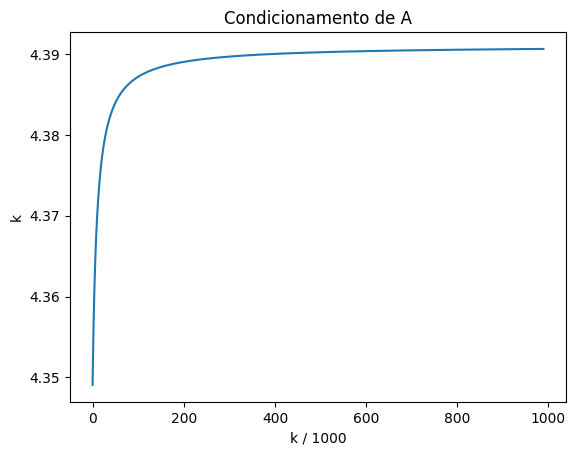

In [3]:
def condicionamento_2(A):
    # Calculando o condicionamento para a norma 2 da matriz A:
    eigenValues = np.linalg.svdvals(A)
    k = max(eigenValues)/min(eigenValues)
    
    return k

k_s = []
for m in range(100, 10000, 10):
    A = []
    for i in range(m + 1):
        A.append([1, i/m])
    A = np.array(A)
    k = condicionamento_2(A)
    k_s.append(k)

plt.plot(k_s), plt.title('Condicionamento de A'), plt.xlabel(f'k / 1000'), plt.ylabel(f'k')
plt.show()

O gráfico nos leva a crer que à uma convergência explicita do condicionamento de A. Iremos provar isto.  

Como estamos usando o condicionamento em relação à norma-2 da matriz, devemos calcular os autovalores de $A^TA$:
$$
A^TA = \begin{bmatrix}
m + 1 & \frac{m+1}{2} \\
\frac{m+1}{2} & \frac{(m+1)(2m + 1)}{6m}
\end{bmatrix}
$$

Porém, como $m$ tende ao infinito, a nossa matriz passa a ser 

$$
A^TA = \begin{bmatrix}
m & \frac{m}{2} \\
\frac{m}{2} & \frac{2m}{3}
\end{bmatrix}
$$

Calculando os autovalores dela:
$$
 (\lambda - m)(\lambda - 2m/3) = m^2/4
$$
$$
12\lambda^2 - 20m\lambda + 5m^2 = 0
$$

$$
\lambda \isin \set{20 + 4\sqrt{10}, 20 - 4\sqrt{10}}
$$

Então podemos escrever nosso condicionamento quando $m$ tende ao infinito como 
$$
k(A) = \frac{\sigma_{max}(A)}{\sigma_{min}(A)}  = \frac{20 + 4\sqrt{10}}{20 - 4\sqrt{10}}
$$

Logo o condicionamento converge para $\frac{20 + 4\sqrt{10}}{20 - 4\sqrt{10}}$

---

## c) Mais regressores. Suponha que, além de funções afins, podemos usar polinômios de grau até n, ou seja, funções da forma $f (t) = α_0 + α_1t + . . . + α_nt^n$. Qual é o sistema que devemos resolver (novamente, em mínimos quadrados) para encontrar os coeficientes αi? 

O nosso problema ainda terá uma forma do tipo
$$
Ax = b
$$
Porém queremos algo mais geral agora, onde
$$
A = \begin{bmatrix}
1 & t_1 & \cdots & t_1^n \\
1 & t_2 & \cdots & t_2^n \\
\vdots & \vdots & \ddots & \vdots \\
1 & t_m & \cdots & t_m^n
\end{bmatrix}, 

x = \begin{bmatrix}
\alpha_0 \\
\alpha_1 \\
\vdots \\
\alpha_n
\end{bmatrix},

b = \begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_m
\end{bmatrix}
$$


Agora queremos minimizar o seguinte erro:
$$
E(x) = 
\| b - Ax \|_2^2 
$$
Derivando em relação ao vetor $x$
$$
\frac{\partial E}{\partial x} = -2A^Tb - 2A^TAx = 0
$$
Portando, o Sistema de equações que resolve $x$ é definido por
$$
A^TAx = A^Tb
$$


---



## d) Escreva uma função poly_ls(m,n) que calcula a matriz A correspondente


In [4]:
def poly_ls_1(m,n):
    A = []
    for i in range(m + 1):
        line = []
        t_i = i/m
        for j in range(n + 1):
            line.append(t_i**j)
        A.append(line)
    A = np.array(A)
    return A



---

## e) Fixe m = 100 e faça n crescer até 20. O que acontece com o condicionamento de A?

Fixando $m = 100$ e incrementando $n$ até $20$ podemos analizar o condicionamento da matriz A:

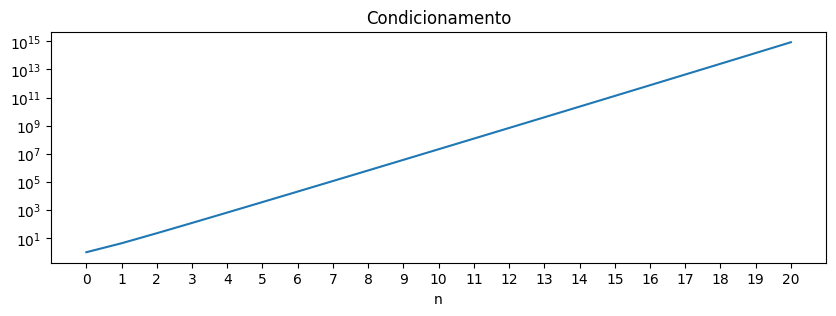

In [5]:
k_s1 = []
m = 100
for n in range(21):
    A = poly_ls_1(m, n)
    k = condicionamento_2(A)
    k_s1.append(k)
    
k_s1 = np.array(k_s1)
plt.figure(figsize=(10,3))
plt.plot(k_s1)
plt.title('Condicionamento')
plt.xticks(range(21))
plt.xlabel('n')
plt.yscale('log')
plt.show()

Pelo gráfico, o condicionamento de $A$ cresce para o infinito quando aumentamos $n$

---

## f) Centralizando. Use agora $ t_i = \frac{i}{m} − \frac{1}{2} $. Modifique a função poly_ls e compare graficamente os números de condicionamento.

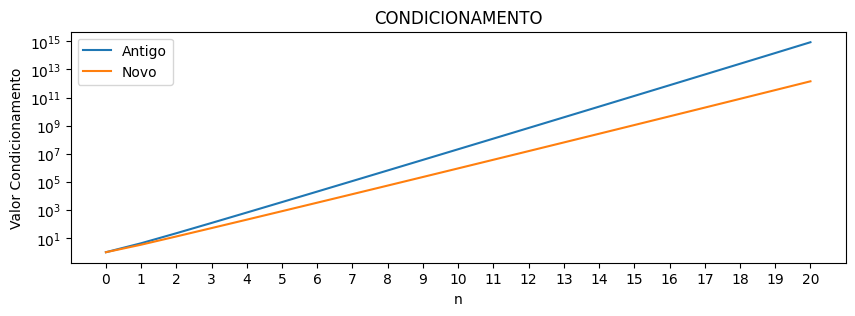

In [6]:
def normalize(x):
    return x / np.linalg.norm(x) 

def poly_ls_2(m,n):
    A = []
    for i in range(m + 1):
        line = []
        t_i = i/m - 1/2
        for j in range(n + 1):
            line.append(t_i**j)
        A.append(line)
    A = np.array(A)
    return A

k_s2 = []
m = 100
for n in range(21):
    A = poly_ls_2(m, n)
    k = condicionamento_2(A)
    k_s2.append(k)
k_s2 = np.array(k_s2)

plt.figure(figsize=(10,3))
plt.plot(k_s1, label='Antigo')
plt.plot(k_s2, label='Novo')
plt.xlabel('n')
plt.ylabel('Valor Condicionamento')
plt.yscale('log')
plt.xticks(range(21))
plt.legend()
plt.title('CONDICIONAMENTO')
plt.show()


Ambos os condicionamentos tendem ao infinito, porém o antigo cresce muito mais rápido em função de $n$

---


# Questão 2. Três algoritmos para mínimos quadrados.

## a) Escreva três funções: ls_qr(A,b), ls_svd(A,b) e ls_normal(A,b) que resolvem o problema de mínimos quadrados Ax = b usando, respectivamente, a fatoração QR de A, a SVD de A, e o sistema de equações normais. As funções devem retornar o vetor dos coeficientes x e o ajuste y = Ax

In [7]:
def ls_qr(A, b):
    """Resolve o problema de mínimos quadrados pelo método da fatoração QR"""
    try:
        Q, R = np.linalg.qr(A)
        Q_ = np.conjugate(Q).T
        projection = Q_ @ b
        x = np.linalg.solve(R, projection)
        return x, A @ x
    except:
        x = np.zeros(A.shape[1])
        return x, A @ x
    
def ls_svd(A, b):
    """Resolve o problema de mínimos quadrados pelo método da decomposição SVD"""
    try:
        U, E, V_ = np.linalg.svd(A, full_matrices=False) 
        E = np.diag(E)
        V = np.conjugate(V_).T
        U_ = np.conjugate(U).T
        projection = U_ @ b
        w = np.linalg.solve(E, projection)
        x = V @ w

        return x, A @ x
    except:
        x = np.zeros(A.shape[1])
        return x, A @ x
    
def ls_normal(A, b):
    """Resolve o problema de mínimos quadrados pelo método normal"""
    A_ = np.conjugate(A).T
    projection = A_ @ b
    try:
        R = np.linalg.cholesky(A_ @ A)
    except:
        x = np.zeros(A.shape[1])
        return x, A @ x
    R_ = np.conjugate(R).T
    w = np.linalg.solve(R, projection)
    x = np.linalg.solve(R_, w)
    return x, A @ x





---


## b) Teste os três algoritmos acima para calcular a regressão linear das funções $f (t) = sin (t)$, $g(t) = e^t$, e $h(t) = cos (3t)$, usando 100 pontos igualmente espaçados em [0, 1], e usando a sua função poly_ls. Faça gráficos das funções e das aproximações obtidas. O que você observa?

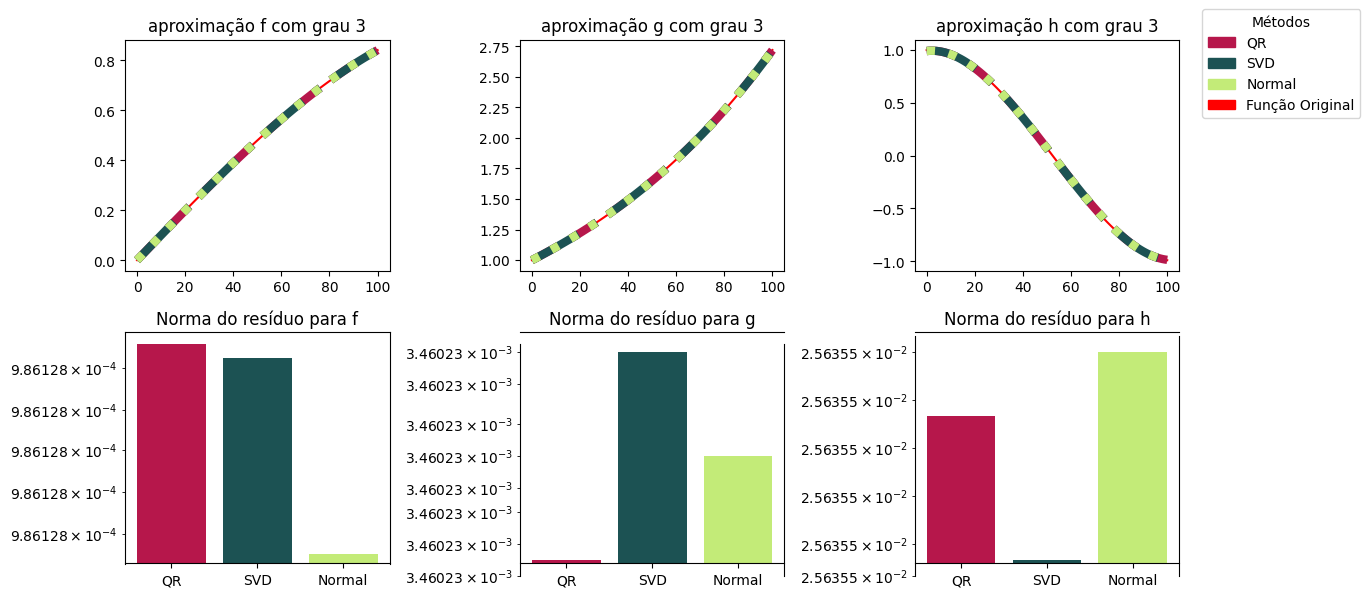

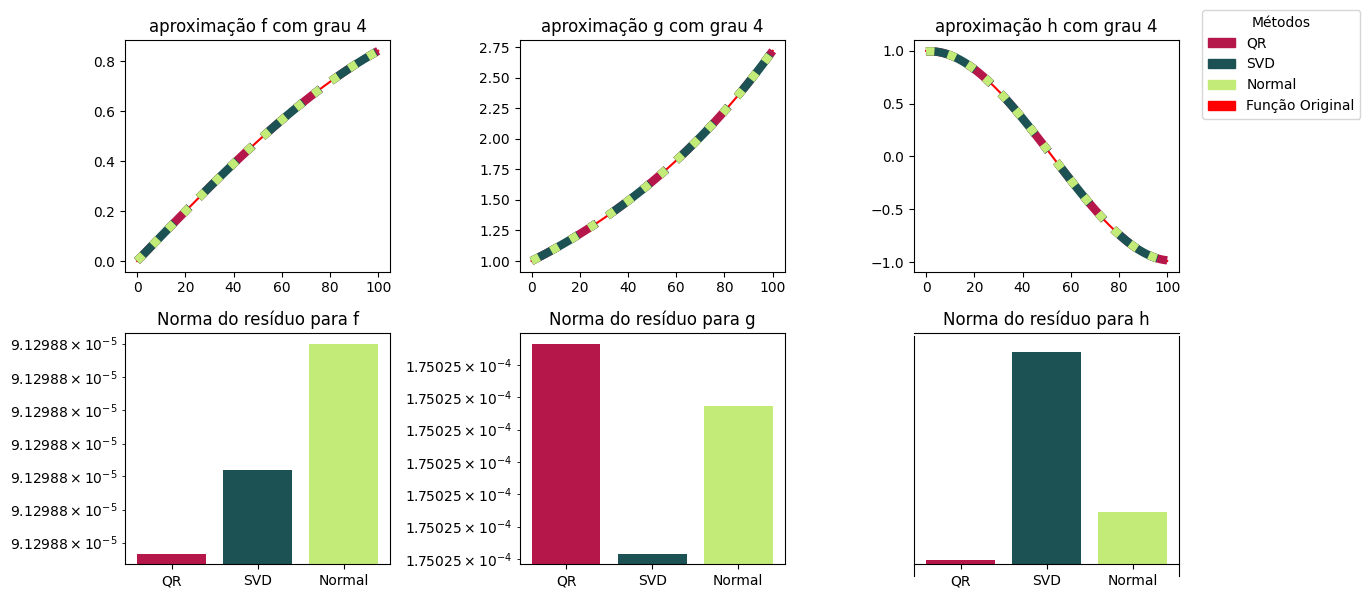

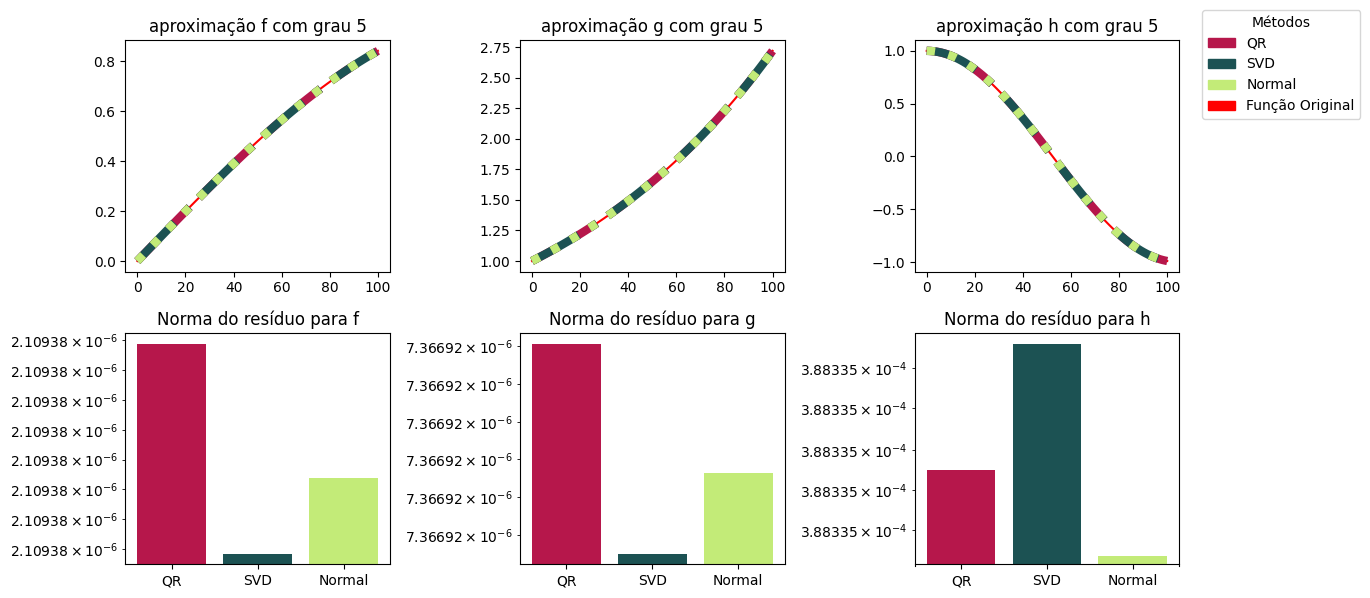

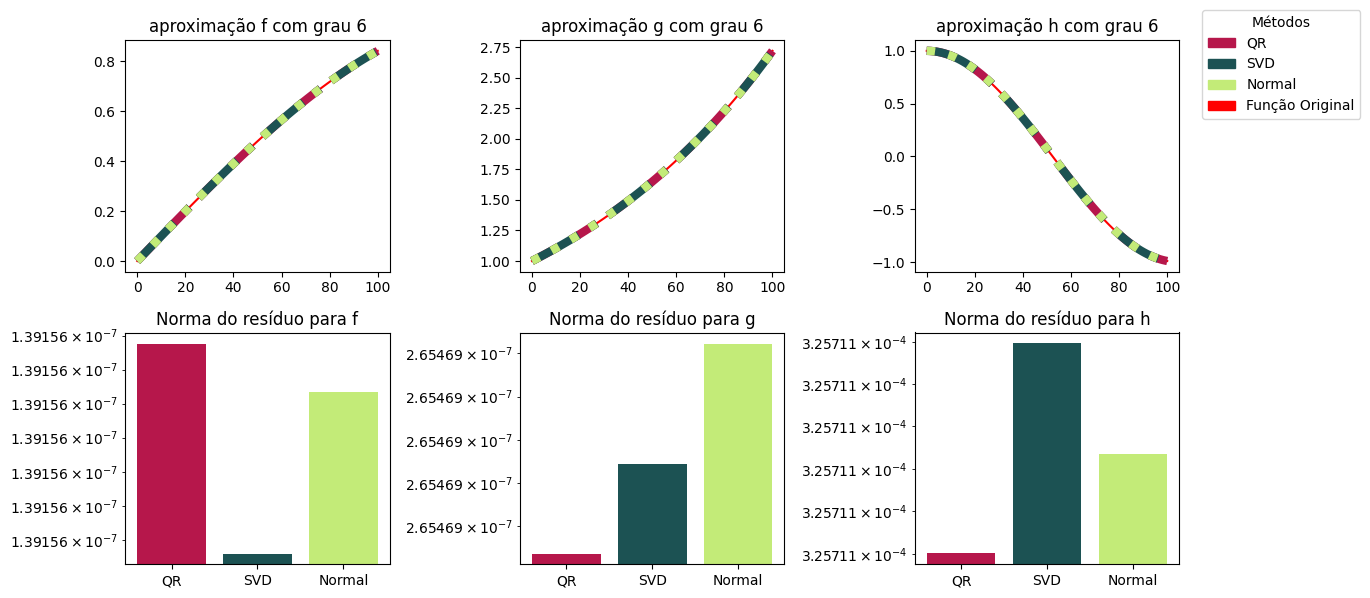

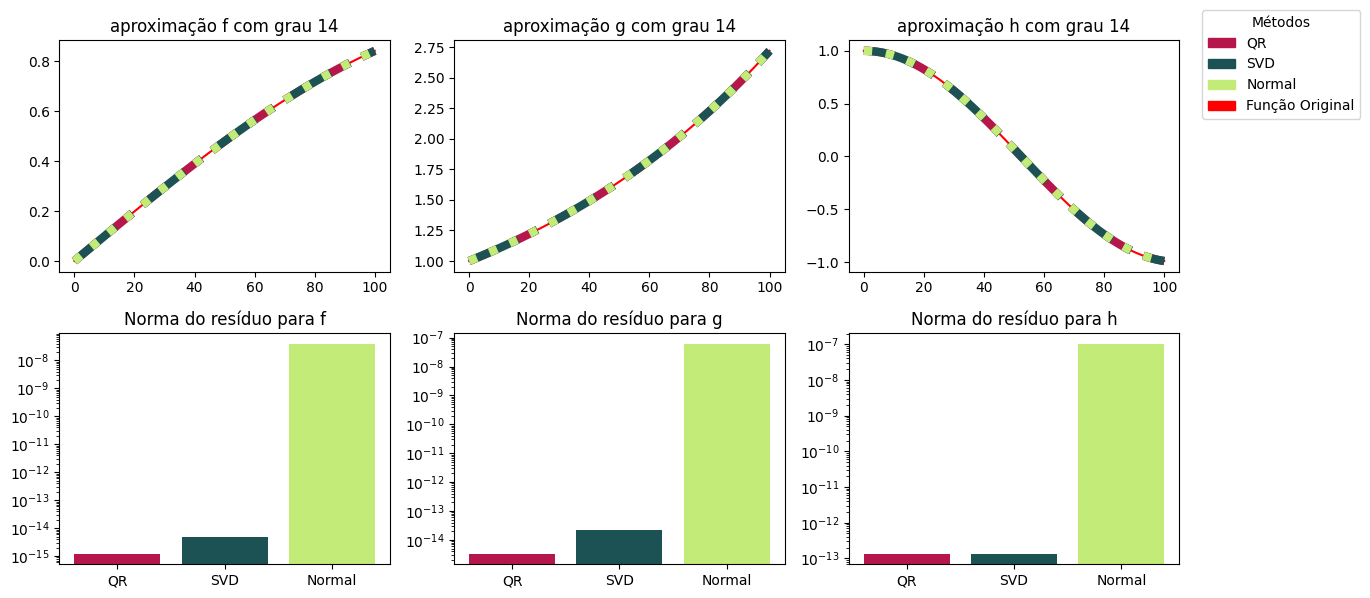

In [13]:
nomes_func = ['f', 'g', 'h']
linhas_metodos = ['--', '-.', ':']
cores = ['#b6174b', '#1c5253', '#c3eb78', 'red']
metodos = [ls_qr, ls_svd, ls_normal]
nomes_metodos = ['QR', 'SVD', 'Normal', 'Função Original']
def b(n, m, figSize=(12,6), retornar_residuo=False, plotar=True):
    residuos_totais = [] # para montar um grafico
    t = np.linspace(0, 1, m+1)
    A = poly_ls_1(m, n)
    lista_funcoes = [np.sin(t), np.exp(t), np.cos(3 * t)]
    # blue para qr
    # green para svd
    # orange para normal
    # red função original
    if plotar:
        fig, axs = plt.subplots(2, 3, figsize=figSize)

    ja_falhou = False
    for idx,f in enumerate(lista_funcoes):
        residuos = [] # Resíudos de QR, SVD e Normal, respectivamente 
        if plotar:
            axs[0, idx].plot(f, color=cores[-1])
            axs[0, idx].set_title(f'aproximação {nomes_func[idx]} com grau {n}')
        for idx2, metodo in enumerate(metodos):
            x_f_metodo, f_metodo = metodo(A, f)
            r_metodo = f - f_metodo
            residuos.append(np.linalg.norm(r_metodo))

            if (x_f_metodo.all() == np.zeros(A.shape[1]).all()):
                if (ja_falhou):
                    continue
                print(f"{nomes_metodos[idx2]} falhou para o grau {n} ") 
                ja_falhou = True
            else:
                if plotar:
                    axs[0, idx].plot(f_metodo,linhas_metodos[idx2], label=nomes_metodos[idx2], color=cores[idx2], linewidth=6)
            
        residuos_totais.append(residuos)
        if (plotar):
            axs[1, idx].bar(x=['QR', 'SVD', "Normal"], height=residuos, color=cores)
            axs[1, idx].set_yscale('log')
            axs[1, idx].set_title(f'Norma do resíduo para {nomes_func[idx]}')

    if (plotar):
        handles = [mpatches.Patch(color=color) for color in cores]
        fig.legend(handles=handles, labels=nomes_metodos, loc='upper left', bbox_to_anchor=(1, 1), title="Métodos")
        plt.tight_layout()
        plt.show()
    if(retornar_residuo):
        return tuple(residuos_totais)


m = 100
n = 2
b(3,m)
b(4,m)
b(5,m)
b(6,m)
b(14,m)

## Explicação do código
- A função b(n) calcula a resolução do sistema para o grau $n$, criando ao final dois gráficos para cada função do conjunto $\set{sin (t),e^t,cos (3t)}$, o primeiro sendo a aproximação da função por cada método e o segundo um histograma mostrando a norma dois do resíduo de cada método. 
- Caso um método falhe, o primeiro gráfico deixa de ter a sua respectiva aproximação desenhada e o segundo (dos resíduos) passa a ter o erro como a própria função, ou seja, a norma do vetor $\set{f(t_i)}^n_{i= 1}$.

## Observações

- É observado que independente de nosso método de decomposição escolhido (QR, SVD ou Normal), houve uma boa aproximação para $n = \set{3, 4, 5, 6}$. Os melhores métodos variam para o grau $n$ e as funções escolhidas, com os erros estando relativamente pertos uns dos outros.
- Já para $n = 14$, tivemos um mal resultado, quando comparado com os outros, do método Normal.

## Explicação da observação

- É esperado que, para graus mais baixos, o problema de mínimos quadrados responda com uma boa aproximação para todos os métodos acima, visto que não há uma propagação de erros tão acentuada para nenhum dos algoritmos no momento.
- O resultado considerado inferior que o método Normal produziu para $n=14$ poderia ser explicado usando os conceitos de erros e aproximações em cálculos numéricos num computador. A matriz $A^TA$ usada no método Normal produz muitos erros devido às potências, logo o resultado esperado terá uma má aproximação do ideal de cada função.

# c) Agora, ajuste as mesmas funções, mas usando polinômios de grau até n = 15. O que acontece conforme o grau aumenta? Todos os três algoritmos dão bons resultados?

Normal falhou para o grau 13 
Normal falhou para o grau 15 


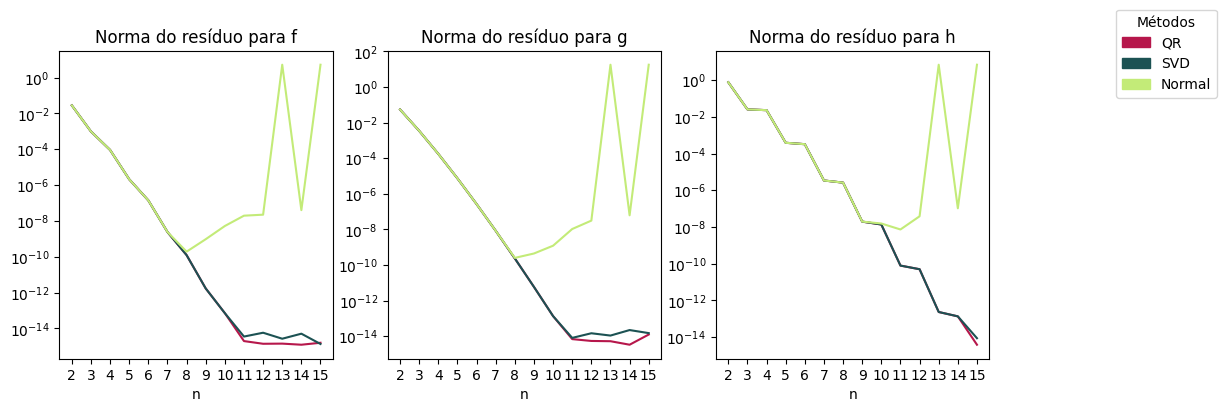

In [ ]:
m = 100
xTicks = []
residuos_f = []
residuos_g = []
residuos_h = []
for n in range(2, 16):
    xTicks.append(n)
    f, g, h = b(n,m,figSize=(12,4), retornar_residuo=True, plotar=False)
    residuos_f.append(f)
    residuos_g.append(g)
    residuos_h.append(h)

rf = np.array(residuos_f)
rg = np.array(residuos_g)
rh = np.array(residuos_h)

fig, axs = plt.subplots(1, 3, figsize=(12,4))
r_list = [rf, rg, rh]
for idx, r in enumerate(r_list):
    for i in range(3):
        axs[idx].plot(xTicks, r[:, i], color=cores[i], label=f'{nomes_metodos[i]}')  # Plotando a coluna com a cor correspondente
    axs[idx].set_yscale('log')
    axs[idx].set_xticks(xTicks)
    axs[idx].set_title(f'Norma do resíduo para {nomes_func[idx]}')
    axs[idx].set_xlabel(f'n')

handles = [mpatches.Patch(color=color) for color in cores[:-1]]
fig.legend(handles=handles, labels=nomes_metodos[:-1], loc='upper left', bbox_to_anchor=(1, 1), title="Métodos")
plt.show()


## Explicação do código

- O código utiliza a mesma função b(n) anterior, porém omite os gráficos gerados por ela e somente armazena os resíduos de cada iteração. Ao final é criado um gráfico de linha para mostrar a variação do resíduo em relação ao incremento de $n$.

## Observações
- Conforme o grau aumenta, nosso resíduo tende a diminuir para cada método.
- A partir do grau 13, temos que o método Normal começa a falha.
- para o método normal, apesar de ser muito parecido com o de SVD e QR para graus menores que 8, tende a ser muito maior em relação aos outros

## Explicação das observações

- O resíduo tende a diminuir conforme o grau aumenta pois estamos dando uma maior liberdade para a função aproximada. Um polinômio com maior grau terá uma menor restrição de curvatura no espaço, assim sendo mais "encaixável" em uma outra função, principalemnte as não polinomiais.
- O método Normal começa a apresentar falhas a partir do grau 13 pois a sua fatoração, numérica, de Cholesky passa a não ser mais calculável (numericamente a matriz $A^*A$ pode não ser mais positiva definida).  
    - Como temos uma matriz de Vandermonde com cada vez com mais colunas (maiores expoentes) a cada iteração, o erro devido à arredondamentos float por parte do computador é propagado de forma horrível. É conclusível que as colunas de $A^*A$ acabam ficando quase dependentes umas das outras, assim, temos autovalores muito próximos a zero (possívelmente zero em alguns casos maiores).
- O método Normal fica pior que os outros para graus maiores pelo mesmo motivo que sua fatoração Cholesky pode não ser mais calculável: mau condicionamento do problema. Os erros e aproximações começam a prejudicar, e muito, o problema de mínimos quadrados.
 
